In [1]:
import pandas as pd
import numpy as np

In [436]:
# Make a dataframe from Excel files in the GitHub repo

# Income-per-Capita (individual, not household, median income in the US )
ipc = pd.read_csv("https://raw.githubusercontent.com/brmkim/599GroupRepo/master/income_per_capita.csv")

#Total Import from China to the US in USD
totalImp = pd.read_csv("https://raw.githubusercontent.com/brmkim/599GroupRepo/master/total_import_from_china_to_US.csv")
totalImp = totalImp.dropna()  # dropping NaN or NA values

In [413]:
# Now for the tariff data....
import xlrd 

# Copying the data directly from the source webpage. Saving it to a dataframe
allMeans = pd.read_excel("https://api.worldbank.org/v2/en/indicator/TM.TAX.MRCH.SM.AR.ZS?downloadformat=excel")


In [414]:
allMeans.head(10)

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62
0,Last Updated Date,2019-01-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2009.00,2010.00,2011.00,2012.00,2013.00,2014.00,2015.00,2016.00,2017.00,2018.0
3,Aruba,ABW,"Tariff rate, applied, simple mean, all product...",TM.TAX.MRCH.SM.AR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10.20,10.13,10.16,NaN,9.77,10.27,9.99,NaN
4,Afghanistan,AFG,"Tariff rate, applied, simple mean, all product...",TM.TAX.MRCH.SM.AR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.51,6.47,NaN,NaN,NaN,NaN,NaN
5,Angola,AGO,"Tariff rate, applied, simple mean, all product...",TM.TAX.MRCH.SM.AR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.49,7.59,7.58,7.43,7.42,11.19,10.44,10.90,NaN,NaN
6,Albania,ALB,"Tariff rate, applied, simple mean, all product...",TM.TAX.MRCH.SM.AR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.71,5.78,2.15,1.65,1.67,1.25,1.24,1.44,1.22,NaN
7,Andorra,AND,"Tariff rate, applied, simple mean, all product...",TM.TAX.MRCH.SM.AR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Arab World,ARB,"Tariff rate, applied, simple mean, all product...",TM.TAX.MRCH.SM.AR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,United Arab Emirates,ARE,"Tariff rate, applied, simple mean, all product...",TM.TAX.MRCH.SM.AR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.28,NaN,4.76,4.35,4.35,4.06,4.03,3.99,4.56,NaN


In [415]:
# From all the rows of countries, we need to look for the china row
temp = allMeans['Data Source'].str.contains('china', case=False, na=False)

# enumerate temp data frame
for i,v in enumerate(temp):
    if v:
        print(i,v) 
#row 41, 97, 147 is True, that is this row has "China" in the first column

41 True
97 True
147 True


In [416]:
allMeans.iloc[41,0]  #41st row is "China"
#allMeans.iloc[97,0]  # 97th row is "Hong Kong SAR, China"
#allMeans.iloc[147,0] #147th row is "Macao SAR, China"

'China'

In [417]:
# Isolate the column names of the table and its 41th row
tariffTable = allMeans.iloc[2,:]
china = allMeans.iloc[41,:]

# Using python's built-in function type() to find out what type of data
# those two were captured by
type(tariffTable) #pandas.core.series.Series
type(china)#pandas.core.series.Series

pandas.core.series.Series

In [418]:
#combining two series data types into a single dataframe
chinaTariff = pd.concat([tariffTable, china], axis=1).reset_index()

# Deleting the meanningles "index"
del chinaTariff['index']
                
chinaTariff

,2,41
0,Country Name,China
1,Country Code,CHN
2,Indicator Name,"Tariff rate, applied, simple mean, all product..."
3,Indicator Code,TM.TAX.MRCH.SM.AR.ZS
4,1960,NaN
5,1961,NaN
6,1962,NaN
7,1963,NaN
8,1964,NaN
9,1965,NaN


In [419]:
# Deleting the explanatory rows and
# years from 1960 to 1991 because we don't have a tariff data
# for those years
tariff = chinaTariff.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,
                          21,22,23,24,25,26,27,28,29,30,31,32,33,34,35], axis=0)
tariff

,2,41
36,1992,39.71
37,1993,37.1
38,1994,33.32
39,1995,NaN
40,1996,22.02
41,1997,16.66
42,1998,17.08
43,1999,16.34
44,2000,16.4
45,2001,15.39


In [420]:
# Renameing the column names
tariff = tariff.rename(columns={2:'Year', 41:'Tariff'})
tariff

,Year,Tariff
36,1992,39.71
37,1993,37.1
38,1994,33.32
39,1995,NaN
40,1996,22.02
41,1997,16.66
42,1998,17.08
43,1999,16.34
44,2000,16.4
45,2001,15.39


In [421]:
# Check data type of tariff df data
tariff.info()

#they all non-null object. I need to change them to correct 
# data type
tariff[['Year']] = tariff[['Year']].astype(int)
tariff[['Tariff']] = tariff[['Tariff']].astype(float)
tariff.info()  # Ok, good.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 36 to 62
Data columns (total 2 columns):
Year      27 non-null object
Tariff    23 non-null object
dtypes: object(2)
memory usage: 648.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 36 to 62
Data columns (total 2 columns):
Year      27 non-null int32
Tariff    23 non-null float64
dtypes: float64(1), int32(1)
memory usage: 540.0 bytes


In [440]:
# Check datatypes of data frames before merging
ipc.info()
totalImp.info()

# Year in totalImp is in float. Chaning it to int
totalImp[['Year']] = totalImp[['Year']].astype(int)
# Checking
totalImp.info()  # Good


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
Year             51 non-null int64
Population       51 non-null int64
CurrentDollar    51 non-null int64
2017Dollar       51 non-null int64
dtypes: int64(4)
memory usage: 1.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 2 columns):
Year              29 non-null float64
TotalImportUSD    29 non-null float64
dtypes: float64(2)
memory usage: 696.0 bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 2 columns):
Year              29 non-null int32
TotalImportUSD    29 non-null float64
dtypes: float64(1), int32(1)
memory usage: 580.0 bytes


In [444]:
# Merging ipc and totalImp with "Year" as a primary key
tempMerge = pd.merge(ipc,totalImp, on ="Year")

tempMerge

,Year,Population,CurrentDollar,2017Dollar,TotalImportUSD
0,2017,323156000,34489,34489,5.054700e+11
1,2016,320372000,33205,33919,4.625420e+11
2,2015,318868000,31653,32751,4.832020e+11
3,2014,316168000,30176,31276,4.684750e+11
4,2013,313443000,30027,31649,4.404300e+11
5,2012,311116000,28281,30250,4.256190e+11
6,2011,308827000,27554,30097,3.993710e+11
7,2010,306553000,26558,29923,3.649530e+11
8,2009,304280000,26530,30385,2.963740e+11
9,2008,301483000,26964,30775,3.377730e+11


In [443]:
tempMerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 5 columns):
Year              28 non-null int64
Population        28 non-null int64
CurrentDollar     28 non-null int64
2017Dollar        28 non-null int64
TotalImportUSD    28 non-null float64
dtypes: float64(1), int64(4)
memory usage: 1.3 KB


In [445]:
# tempMerge needs to be sorted from low to high number of year to be merged with 
# tariff dataframe

#### creating reversing function:  [Prof Magallanes' function]
def reverse(aColumn):
    return max(aColumn) - aColumn + min(aColumn)   # I see what he did!

# Sorting the years using the reverse function 
tempMerge['Year'] = reverse(tempMerge.Year)
tempMerge


,Year,Population,CurrentDollar,2017Dollar,TotalImportUSD
0,1990,323156000,34489,34489,5.054700e+11
1,1991,320372000,33205,33919,4.625420e+11
2,1992,318868000,31653,32751,4.832020e+11
3,1993,316168000,30176,31276,4.684750e+11
4,1994,313443000,30027,31649,4.404300e+11
5,1995,311116000,28281,30250,4.256190e+11
6,1996,308827000,27554,30097,3.993710e+11
7,1997,306553000,26558,29923,3.649530e+11
8,1998,304280000,26530,30385,2.963740e+11
9,1999,301483000,26964,30775,3.377730e+11


In [452]:
# Checking data types of tempMerge and tariff before merging
tempMerge.info()  
tariff.info()  

## Merge the temp and tariff dataframe
merged = pd.merge(tempMerge, tariff, on="Year")
merged  # Looks good


<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 5 columns):
Year              28 non-null int64
Population        28 non-null int64
CurrentDollar     28 non-null int64
2017Dollar        28 non-null int64
TotalImportUSD    28 non-null float64
dtypes: float64(1), int64(4)
memory usage: 1.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 36 to 62
Data columns (total 2 columns):
Year      27 non-null int32
Tariff    23 non-null float64
dtypes: float64(1), int32(1)
memory usage: 540.0 bytes


,Year,Population,CurrentDollar,2017Dollar,TotalImportUSD,Tariff
0,1992,318868000,31653,32751,4.832020e+11,39.71
1,1993,316168000,30176,31276,4.684750e+11,37.10
2,1994,313443000,30027,31649,4.404300e+11,33.32
3,1995,311116000,28281,30250,4.256190e+11,NaN
4,1996,308827000,27554,30097,3.993710e+11,22.02
5,1997,306553000,26558,29923,3.649530e+11,16.66
6,1998,304280000,26530,30385,2.963740e+11,17.08
7,1999,301483000,26964,30775,3.377730e+11,16.34
8,2000,299106000,26804,31767,3.214430e+11,16.40
9,2001,296824000,26352,32117,2.877740e+11,15.39


In [453]:
# Simple descriptive statistics (13 columns, mean tariff is 8.36, etc. )
merged.describe()

,Year,Population,CurrentDollar,2017Dollar,TotalImportUSD,Tariff
count,26.000000,2.600000e+01,26.000000,26.000000,2.600000e+01,23.000000
mean,2004.500000,2.855860e+08,22815.576923,29901.000000,1.995509e+11,14.723478
std,7.648529,2.137543e+07,5225.441931,2161.470907,1.618628e+11,9.615864
min,1992.000000,2.488860e+08,14387.000000,25498.000000,1.523740e+10,7.740000
25%,1998.250000,2.673675e+08,18412.250000,28578.250000,5.427402e+10,8.295000
50%,2004.500000,2.871065e+08,23063.500000,30580.000000,1.388145e+11,9.810000
75%,2010.750000,3.035808e+08,26742.500000,31463.000000,3.336905e+11,16.530000
max,2017.000000,3.188680e+08,31653.000000,32751.000000,4.832020e+11,39.710000


In [457]:
merged.iloc[:, 1:]

,Population,CurrentDollar,2017Dollar,TotalImportUSD,Tariff,Tariff_Reversed
0,318868000,31653,32751,4.832020e+11,39.71,7.74
1,316168000,30176,31276,4.684750e+11,37.10,10.35
2,313443000,30027,31649,4.404300e+11,33.32,14.13
3,311116000,28281,30250,4.256190e+11,NaN,NaN
4,308827000,27554,30097,3.993710e+11,22.02,25.43
5,306553000,26558,29923,3.649530e+11,16.66,30.79
6,304280000,26530,30385,2.963740e+11,17.08,30.37
7,301483000,26964,30775,3.377730e+11,16.34,31.11
8,299106000,26804,31767,3.214430e+11,16.40,31.05
9,296824000,26352,32117,2.877740e+11,15.39,32.06


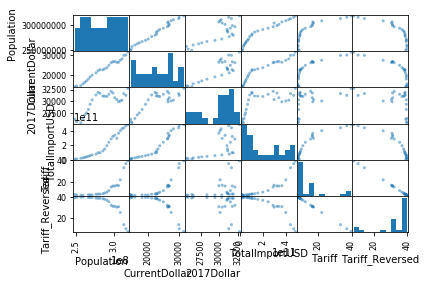

In [467]:
# Testing the scatter plot. 
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(merged.iloc[:,1:]) 
plt.show()
# Looking at all data, you can see Tariff is negatively correlated. 
# So as in the professor's example for scorepress, 
# Tariff might need to be reversed for lm

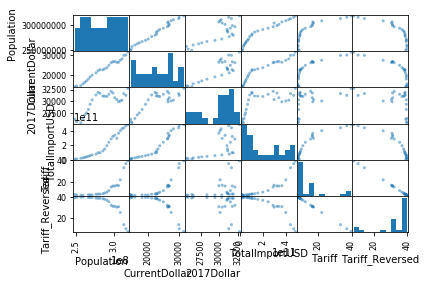

In [468]:
# Making a new column to put reversed Tariff data; and using 
# reverse function 
merged['Tariff_Reversed'] = reverse(merged.Tariff)

#pd.plotting.scatter_matrix(merged.iloc[:,:5]) # Showing population, currentDollar, 2017Dollar, Total Import, and Tariff

pd.plotting.scatter_matrix(merged.iloc[:,1:]) # Shows reversed tariff as well. Redundant?

plt.show()


In [469]:
# Now save as a csv format to use in R
merged.to_csv("tariff_import.csv", index=True)  
# index=True is the default but specified it to emphasize 
# that we're using Year the index for data rows